In [18]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from statistics import mean, stdev
from scipy.stats import sem
import scipy.stats as stats

In [19]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [20]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [21]:
df = pd.read_excel (r'./Bio_212_Exam_2.xlsx', index_col=0) 
df.describe()

,ID,SIS User ID,SUBMIT: Optional Unit 1 Study Guide Here (766514),SUBMIT: Optional Unit 2 Study Guide Here (766515),Exam1,Exam2,Exam2SG
count,26.000000,2.600000e+01,11.000000,13.000000,25.000000,23.000000,11.000000
mean,167058.307692,9.002753e+08,4.863636,4.846154,69.961200,76.536957,89.832727
std,80493.022942,8.810791e+04,0.303390,0.375534,27.831809,21.848380,16.373206
min,2673.000000,9.000571e+08,4.000000,4.000000,0.000000,38.720000,59.470000
25%,170060.750000,9.002595e+08,4.875000,5.000000,60.220000,57.585000,77.395000
50%,196375.500000,9.003109e+08,5.000000,5.000000,72.600000,76.450000,95.320000
75%,218867.500000,9.003309e+08,5.000000,5.000000,91.090000,96.265000,103.850000
max,238690.000000,9.003564e+08,5.000000,5.000000,103.430000,108.500000,108.500000


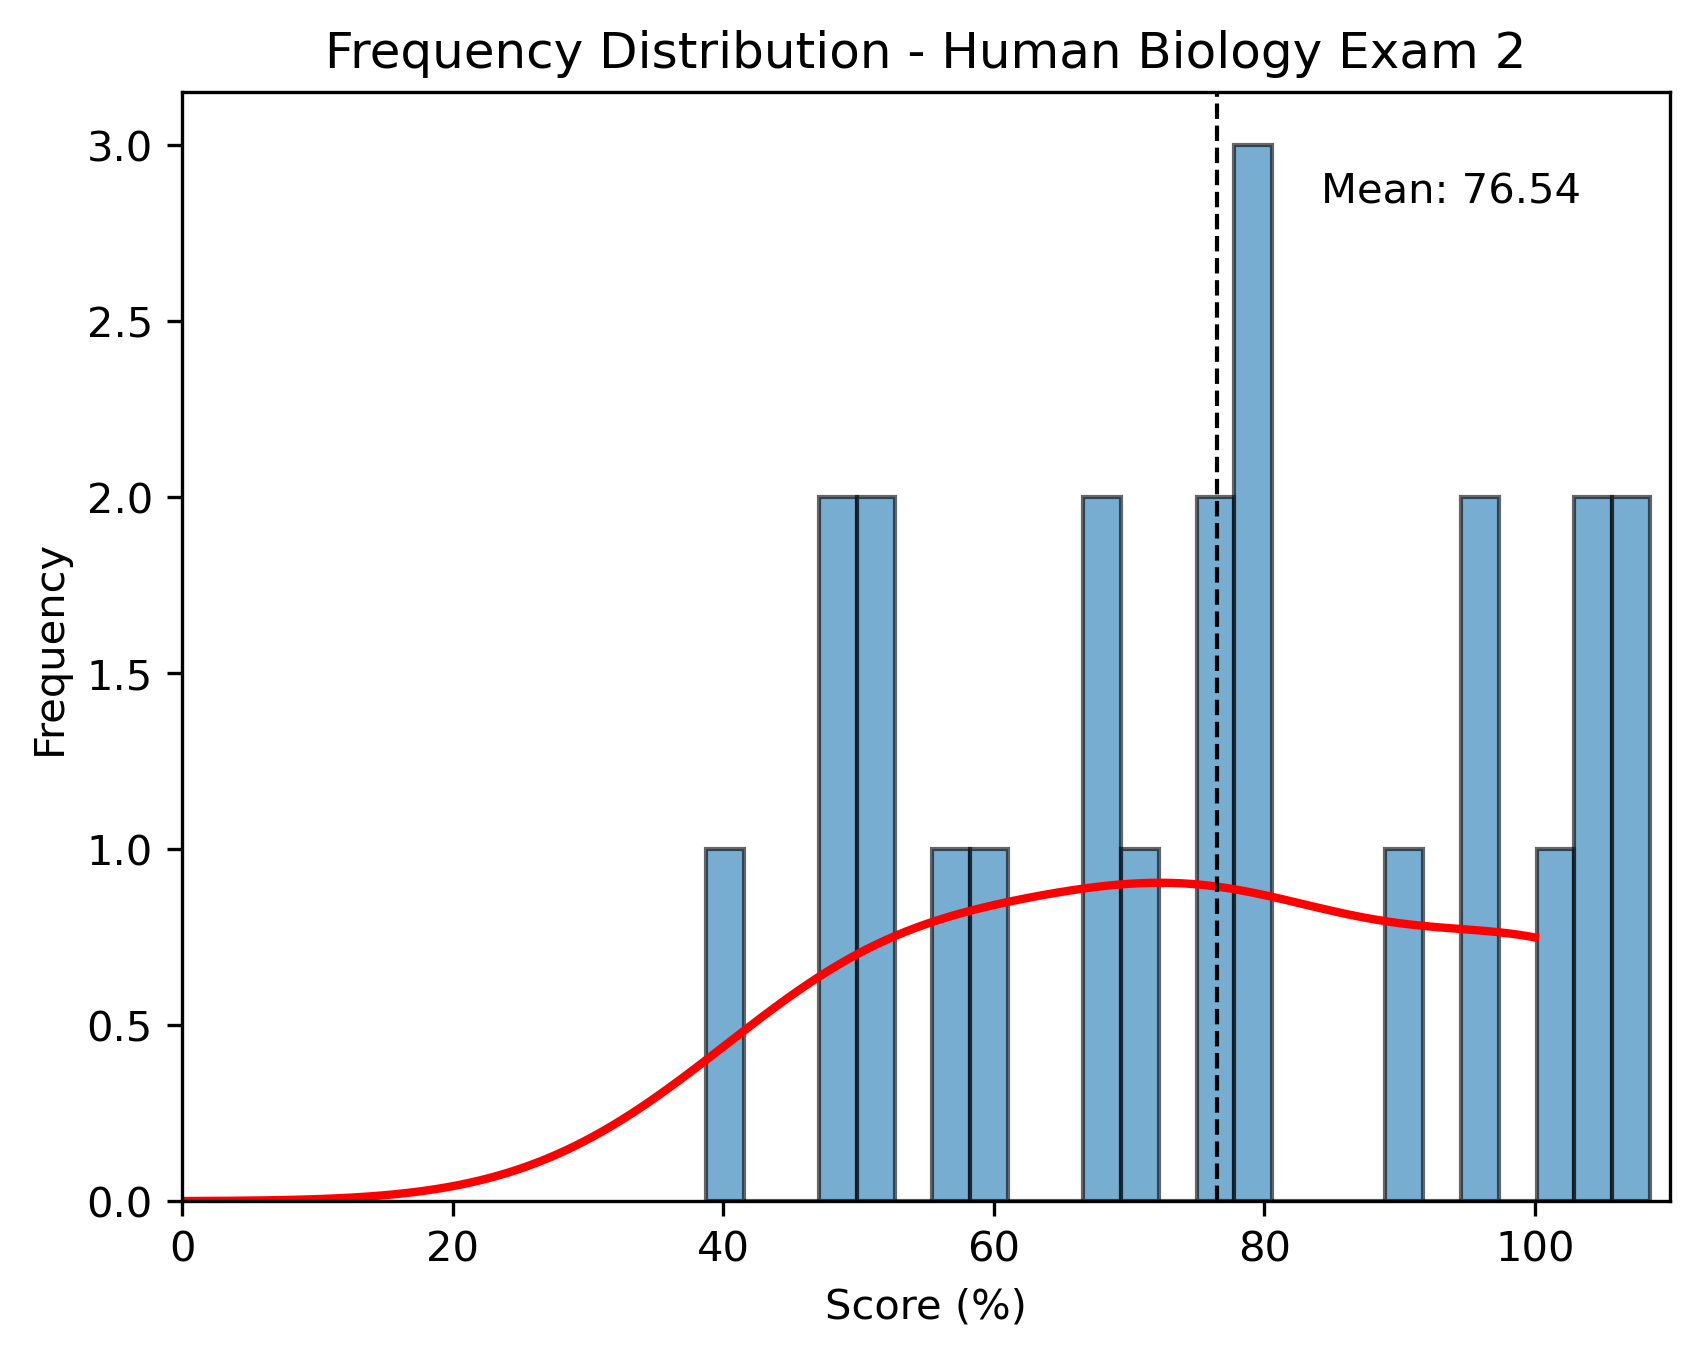

In [36]:
# Plot Histogram on x
x1 = df['Exam2'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution - Human Biology Exam 2', ylabel='Frequency', xlabel='Score (%)')
plt.xlim(0, 110)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()

In [45]:
df['Studyguide_curved'] = df.Exam2SG+5
df['No_Studyguide_curved'] = df.Exam2
df.describe()

,ID,SIS User ID,SUBMIT: Optional Unit 1 Study Guide Here (766514),SUBMIT: Optional Unit 2 Study Guide Here (766515),Exam1,Exam2,Exam2SG,Studyguide_curved,No_Studyguide_curved
count,26.000000,2.600000e+01,11.000000,13.000000,25.000000,23.000000,11.000000,11.000000,23.000000
mean,167058.307692,9.002753e+08,4.863636,4.846154,69.961200,76.536957,89.832727,94.832727,76.536957
std,80493.022942,8.810791e+04,0.303390,0.375534,27.831809,21.848380,16.373206,16.373206,21.848380
min,2673.000000,9.000571e+08,4.000000,4.000000,0.000000,38.720000,59.470000,64.470000,38.720000
25%,170060.750000,9.002595e+08,4.875000,5.000000,60.220000,57.585000,77.395000,82.395000,57.585000
50%,196375.500000,9.003109e+08,5.000000,5.000000,72.600000,76.450000,95.320000,100.320000,76.450000
75%,218867.500000,9.003309e+08,5.000000,5.000000,91.090000,96.265000,103.850000,108.850000,96.265000
max,238690.000000,9.003564e+08,5.000000,5.000000,103.430000,108.500000,108.500000,113.500000,108.500000


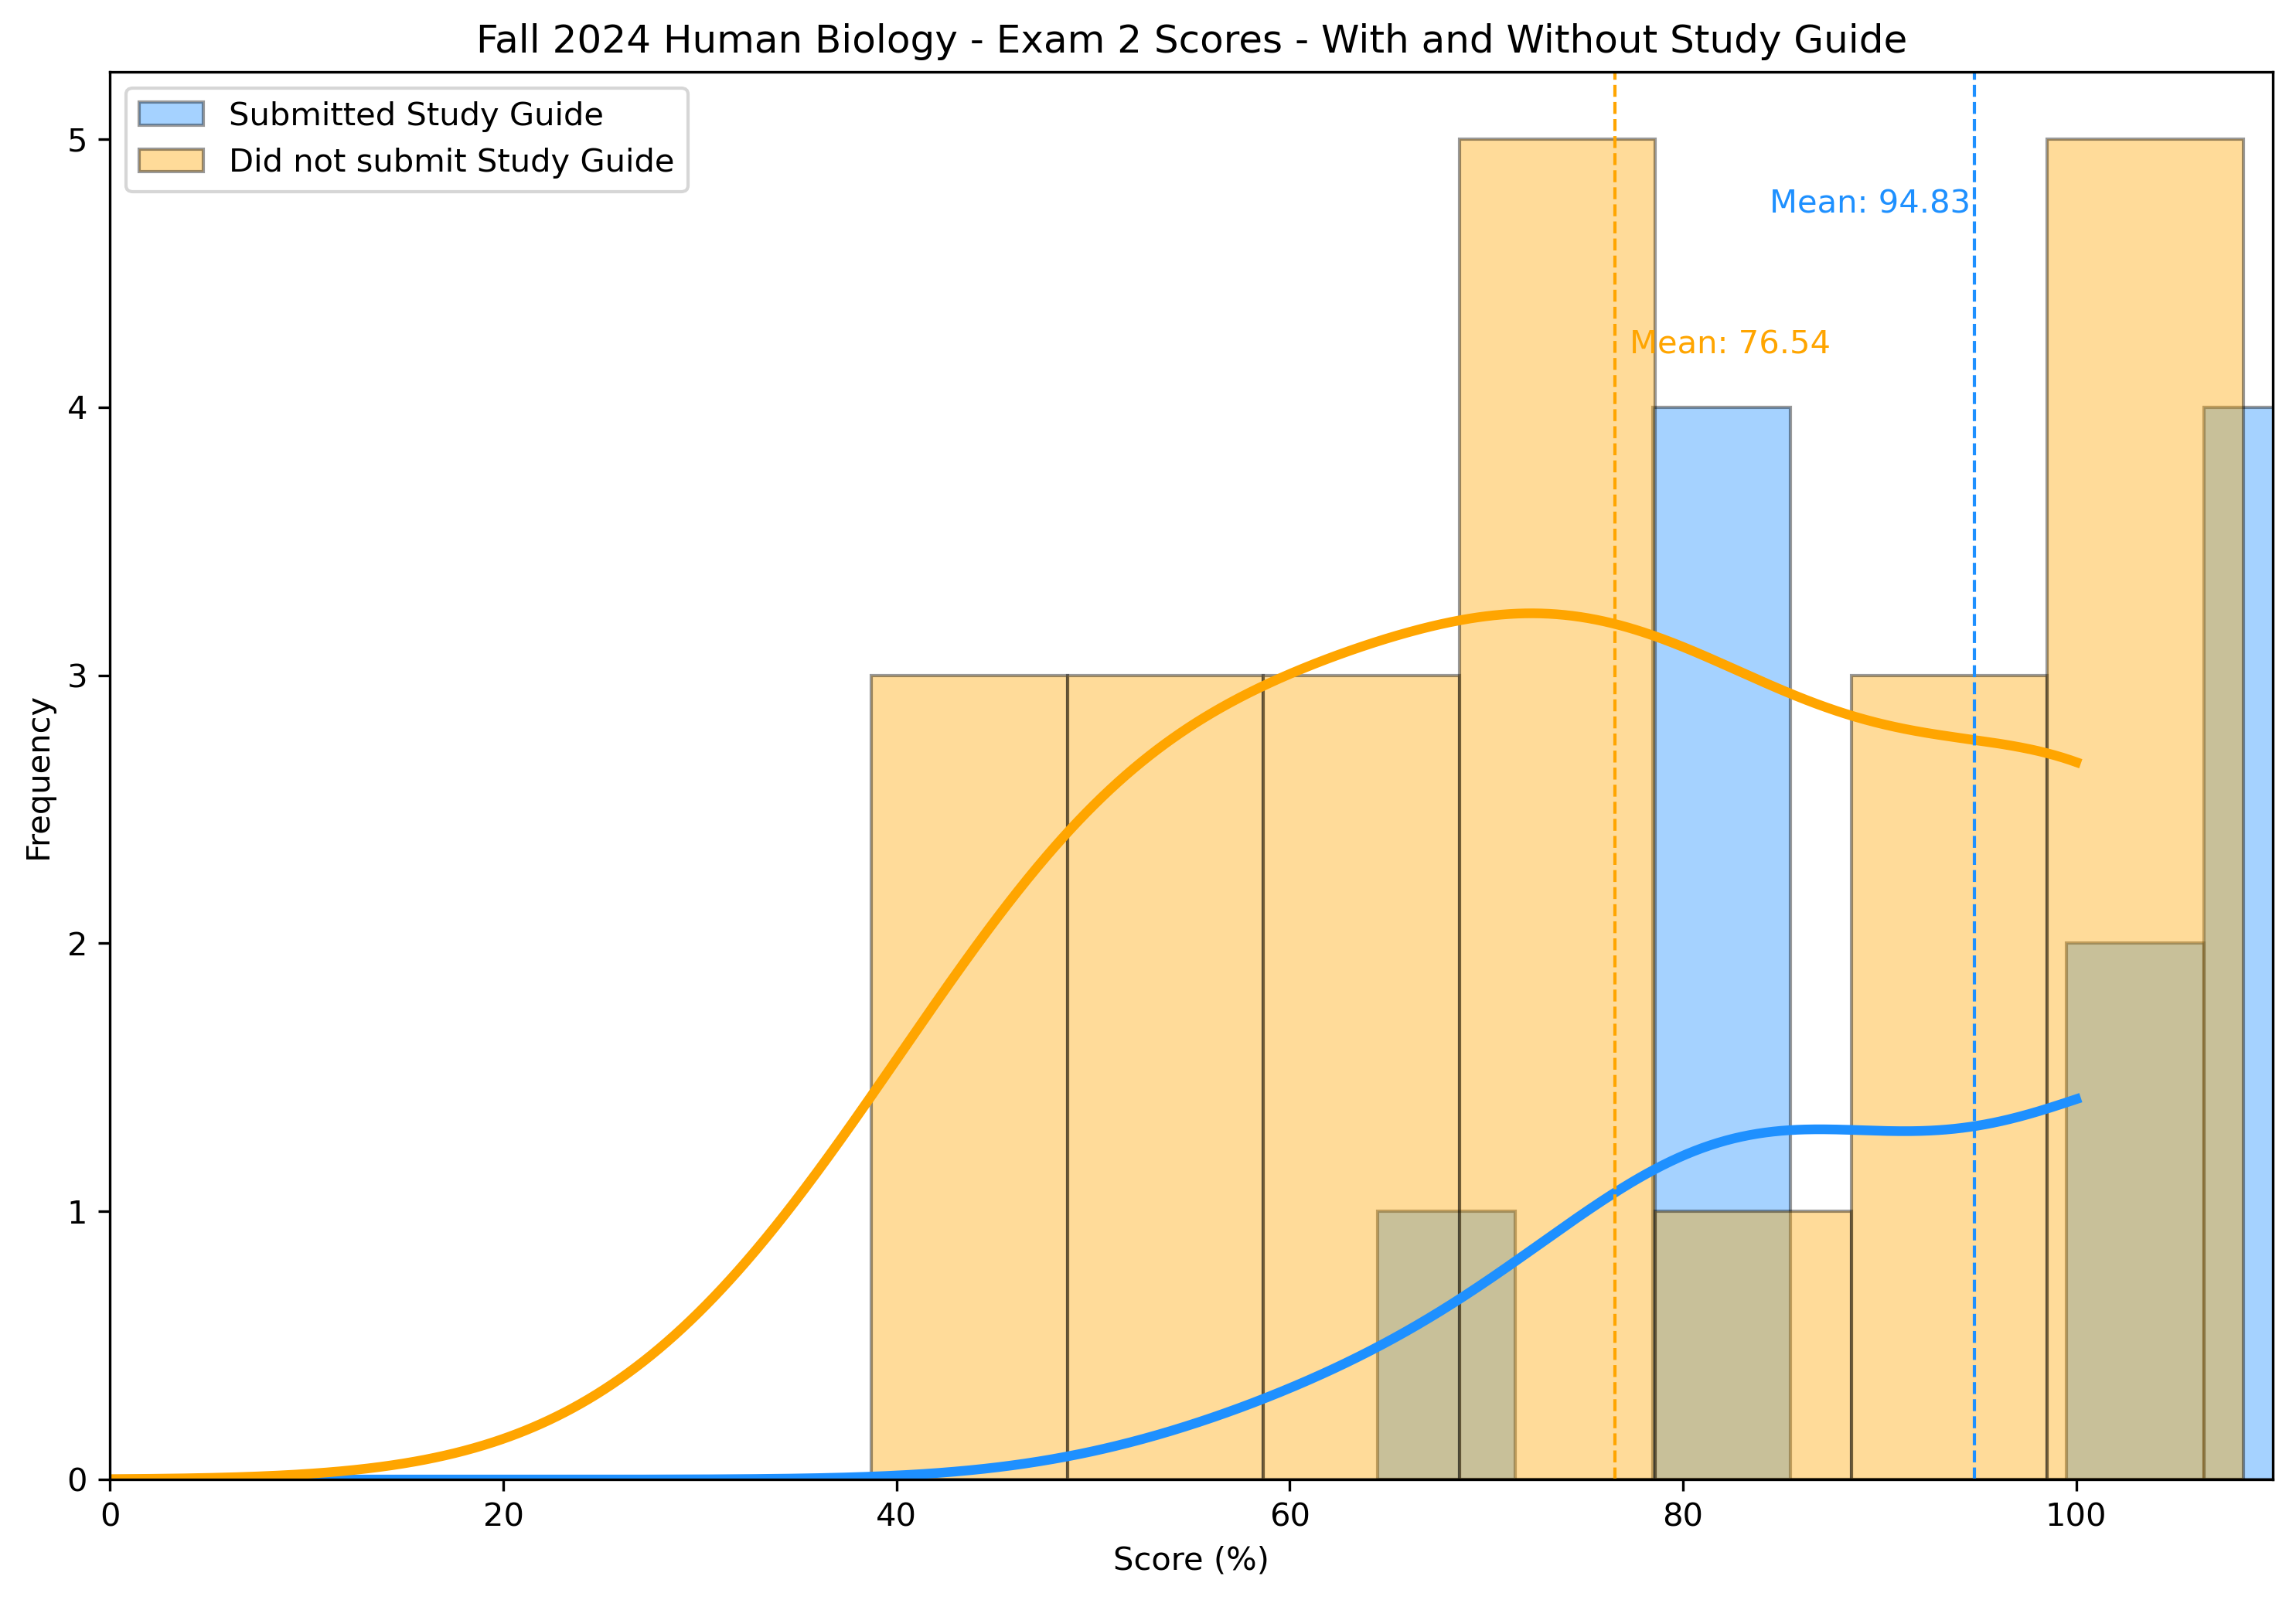

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Sample data for groups x2 and x3
x2 = df.Studyguide_curved.dropna()  # Assuming x2 is for "Submitted Study Guide"
x3 = df.No_Studyguide_curved.dropna()  # Assuming x3 is for "Did not submit Study Guide"

# Number of bins for the histogram
bins = 7

# Setup for inline plots and figure size
plt.figure(figsize=(10, 7), dpi=300)

# Plot histograms for both groups with actual frequency values (density=False)
count_x2, bins_x2, _ = plt.hist(x2, bins=bins, color="dodgerblue", label="Submitted Study Guide", 
                                alpha=0.4, edgecolor='k')
count_x3, bins_x3, _ = plt.hist(x3, bins=bins, color="orange", label="Did not submit Study Guide", 
                                alpha=0.4, edgecolor='k')

# KDE for group x2
kde_x2 = gaussian_kde(x2)
x2_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x2 = bins_x2[1] - bins_x2[0]
plt.plot(x2_range, kde_x2(x2_range) * len(x2) * bin_width_x2, color='dodgerblue', linewidth=3)

# KDE for group x3
kde_x3 = gaussian_kde(x3)
x3_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x3 = bins_x3[1] - bins_x3[0]
plt.plot(x3_range, kde_x3(x3_range) * len(x3) * bin_width_x3, color='orange', linewidth=3)

# Add vertical lines for the means
plt.axvline(x2.mean(), color='dodgerblue', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='orange', linestyle='dashed', linewidth=1)

# Add text labels for means
min_ylim, max_ylim = plt.ylim()
plt.text(x2.mean() * 0.89, max_ylim * 0.9, 'Mean: {:.2f}'.format(x2.mean()), color="dodgerblue")
plt.text(x3.mean() * 1.01, max_ylim * 0.8, 'Mean: {:.2f}'.format(x3.mean()), color="orange")

# Customize plot
plt.xlim(0, 110)
plt.legend()
plt.gca().set(title='Fall 2024 Human Biology - Exam 2 Scores - With and Without Study Guide',
              ylabel='Frequency', xlabel='Score (%)')

plt.tight_layout()
plt.show()

In [47]:
#Assign the names to the following columns:
sg = df.Studyguide_curved.dropna() 
nosg = df.No_Studyguide_curved.dropna()

In [48]:
#Calculate the mean and standard error of mean (SEM)
SG_MEAN = mean(sg)
SG_SEM = sem(sg)
NOSG_MEAN = mean(nosg)
NOSG_SEM = sem(nosg)

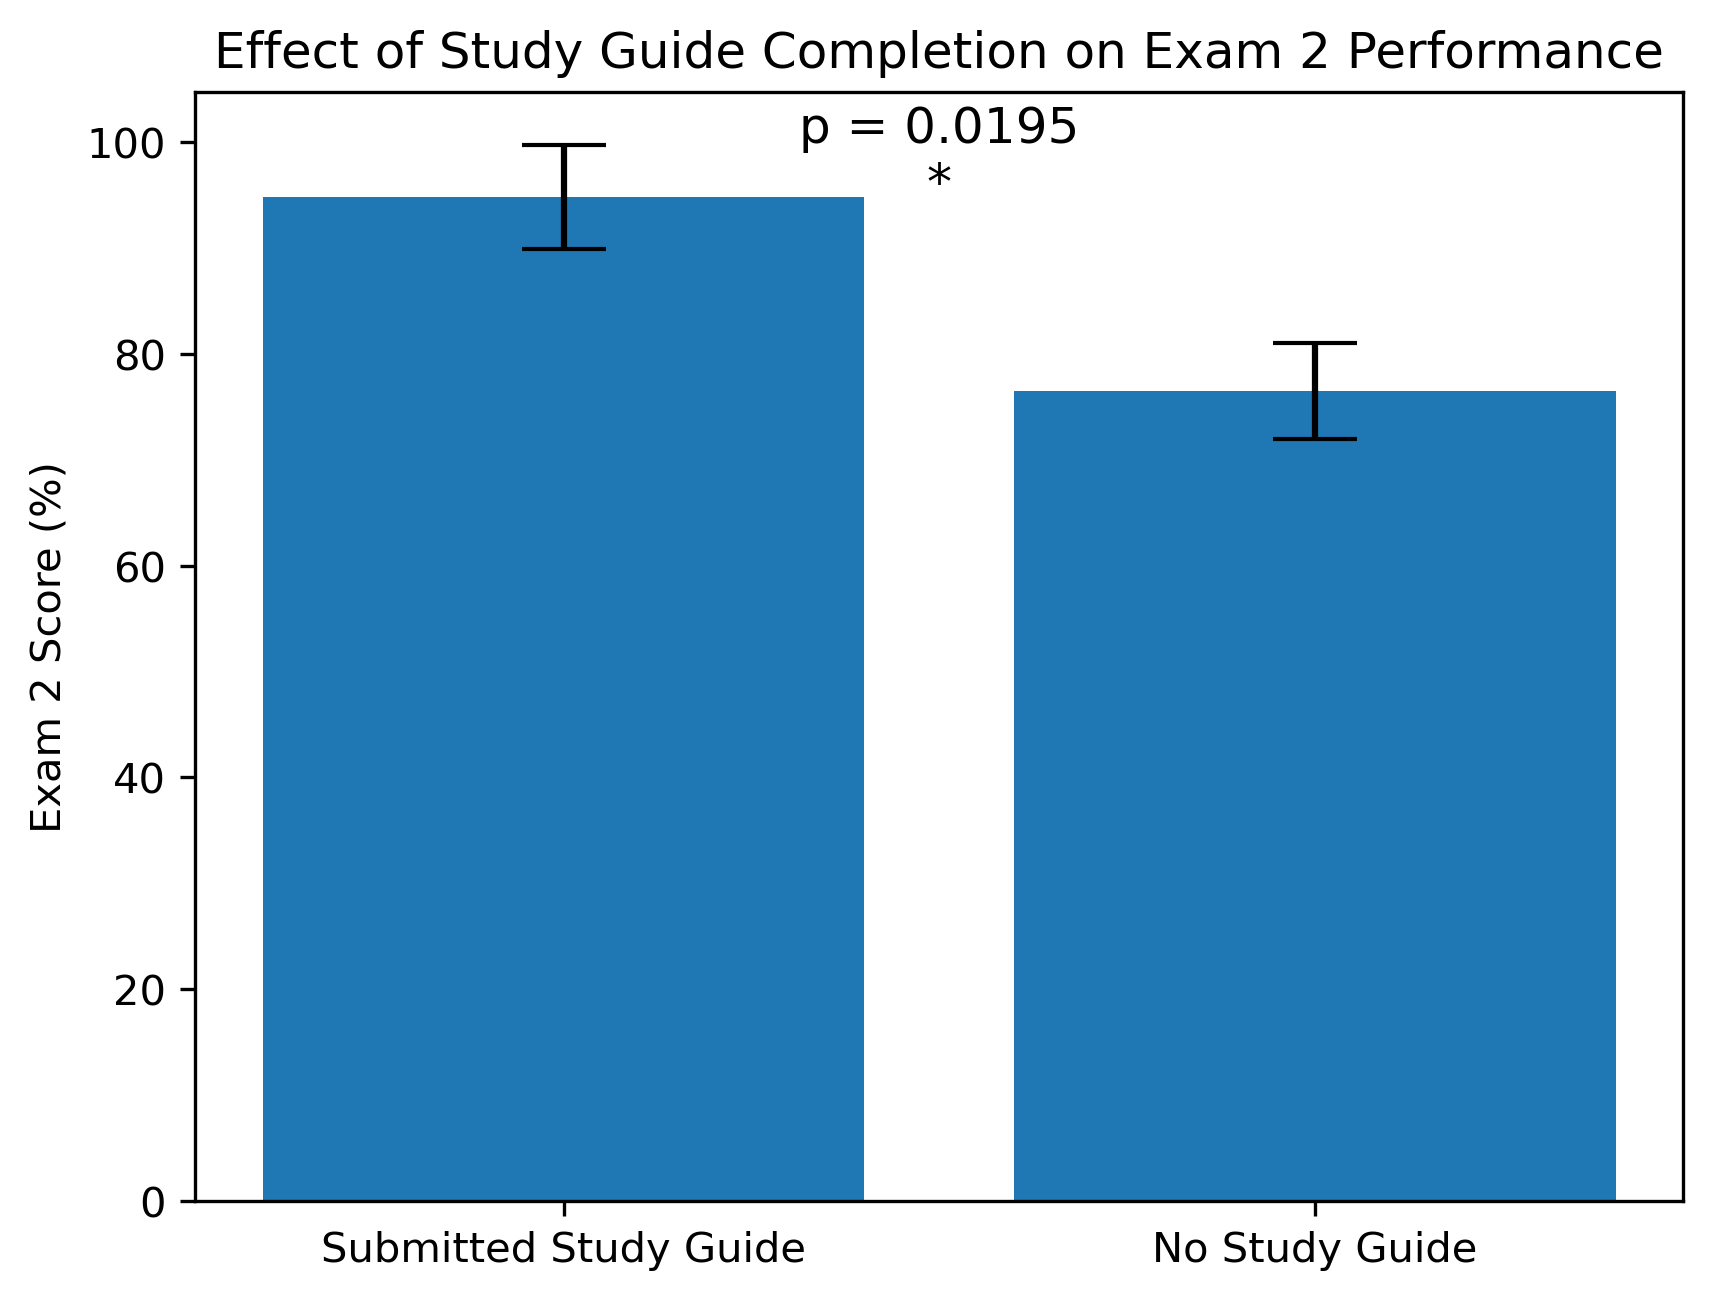

In [49]:
# Perform the t-test
res = stats.ttest_ind(sg, nosg, equal_var=True)
p_value = res.pvalue

# Build the bar plot
plt.bar(['Submitted Study Guide', 'No Study Guide'], [SG_MEAN, NOSG_MEAN], yerr=[SG_SEM, NOSG_SEM], capsize=10)
plt.ylabel('Exam 2 Score (%)')
plt.title('Effect of Study Guide Completion on Exam 2 Performance')

# Determine significance label based on p-value
if p_value < 0.001:
    significance_label = '***'
elif p_value < 0.01:
    significance_label = '**'
elif p_value < 0.05:
    significance_label = '*'
else:
    significance_label = 'n.s.'  # Not significant

# Add the p-value or significance label above the bars
max_y = max(SG_MEAN + SG_SEM, NOSG_MEAN + NOSG_SEM)
plt.text(0.5, max_y * 0.95, f'p = {p_value:.4f}\n{significance_label}', ha='center', fontsize=12)

# Show the plot
plt.show()

In [50]:
from IPython.display import HTML, display
from scipy import stats

# Perform the t-test
res = stats.ttest_ind(sg, nosg, equal_var=True)

# Extract the p-value from the result
p_value = res.pvalue

# Conditional message based on the p-value
if p_value < 0.05:
    significance = "statistically significant"
    comparison = "lower"
else:
    significance = "not statistically significant"
    comparison = "higher"

# Generate the output text
output_text = f"The result of your t-test p-value is: {p_value:.4f}, which is {comparison} than 0.05, making the resulting comparison {significance}."

# Display the output with larger font size using HTML
display(HTML(f'<p style="font-size:40px;">{output_text}</p>'))